In [1]:
import numpy as np 
from matplotlib import pyplot as plt


In [2]:

def euler_cp(x , x_0 , y_0 , z_0, fy , fz , tol=1e-5):

    def rk4_next_val(f,x_0 , y_0 , h):
        y_next = y_0+h*f(x_0 , y_0 )
        return y_next

    def calc(h):
        n = int(abs((x_0-x)/h))
        x_next,y_next ,z_next = x_0, y_0 , z_0
        for i in range(n):
            y_next = rk4_next_val(fy(z_next) , x_next , y_next , h)
            z_next = rk4_next_val(fz(y_next) , x_next , z_next , h)
            x_next += h              
        return [y_next , z_next]

    del_x = 1e-5
    return calc(del_x)


In [3]:
def rk4_cp(x , x_0 , y_0 , z_0, fy , fz , tol=1e-5):

    def rk4_next_val(f,x_0 , y_0 , h):
        f0 = f(x_0,y_0)
        f1 = f(x_0+h/2 ,  y_0+(h/2)*f0)
        f2 = f(x_0+h/2 , y_0+(h/2)*f1)
        f3 = f(x_0+h , y_0+h*f2)
        y_next = y_0+(h/6)*(f0+2*f1+2*f2+f3)
        return y_next

    def calc(h):
        n = int(abs((x_0-x)/h))
        x_next,y_next ,z_next = x_0, y_0 , z_0
        for i in range(n):
            y_next = rk4_next_val(fy(z_next) , x_next , y_next , h)
            z_next = rk4_next_val(fz(y_next) , x_next , z_next , h)
            x_next += h              
        return [y_next , z_next]

    del_x = 1e-5
    return calc(del_x)


In [4]:
def fy(z):
    def f_in(x , y):
        return z
    return f_in

def fz(y):
    def f_in(x , z):
        return (-g/L)*np.sin(y)
    return f_in

In [5]:
g = 9.8 
L = 10/100
theta_0  = np.radians(10)
z_0 = 0 
t_0 = 0 
y_0 = theta_0


## q 02 , Using Euler 

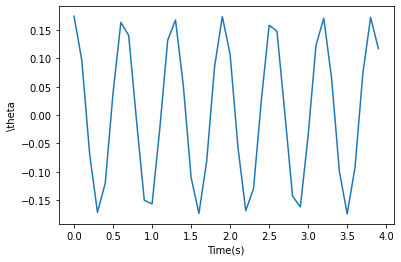

In [6]:
t = np.arange(0, 4 , step = 0.1)

theta = []
theta_dot = []
for ti in t:
    soln = euler_cp( ti , t_0 , y_0 , z_0 , fy , fz)
    t_0 = ti 
    th = soln[0]
    th_dot = soln[1]
    theta.append(th)
    theta_dot.append(th_dot)
    y_0 = th 
    z_0 = th_dot 
plt.plot(t, theta)
plt.xlabel("Time(s)")
plt.ylabel(r"\theta")
plt.show()

## Estimate Time Period

FInding zero crossing 
successive zero crossing will give half of time period.

In [19]:
def find_avg_time(theta , time):
    zero_cross = []
    for i in range(len(theta)-1):
        prev = theta[i]
        nxt = theta[i+1]
        if(prev*nxt<0):
            zero_cross.append(time[i])
    #print(zero_cross)
    z_odd = zero_cross[0::2]
    z_even = zero_cross[1::2]
    
    t_avg_list = [(z2-z1)*2 for z1, z2 in zip(z_odd, z_even)]
    t_avg = sum(t_avg_list)/len(t_avg_list)
    return t_avg


In [20]:
period = find_avg_time(theta , t)
print("Period :{:.2f} ".format (period))

Period :0.64 


## Using RK4

Text(0, 0.5, '\\theta')

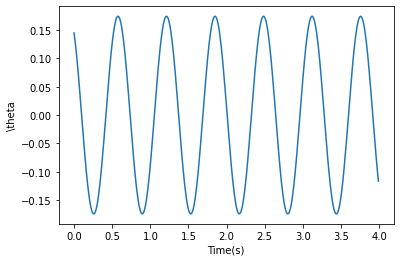

In [22]:
t = np.arange(0, 4 , step = 0.01)
theta = []
theta_dot = []
for ti in t:
    soln = rk4_cp( ti , t_0 , y_0 , z_0 , fy , fz)
    t_0 = ti 
    th = soln[0]
    th_dot = soln[1]
    theta.append(th)
    theta_dot.append(th_dot)
    y_0 = th 
    z_0 = th_dot 

plt.plot(t, theta)
plt.xlabel("Time(s)")
plt.ylabel(r"\theta")

In [ ]:
t = np.arange(0, 4 , step = 0.01)
theta_0_collection = np.radians([10 , 45 , 90 , 135])
theta_collection = [t]
 
for theta_0 in theta_0_collection:
    #theta_0  = np.radians(10)
    y_0 = theta_0
    theta = []
    theta_dot = []
    for ti in t:
        soln = rk4_cp( ti , t_0 , y_0 , z_0 , fy , fz)
        t_0 = ti 
        th = soln[0]
        th_dot = soln[1]
        theta.append(th)
        theta_dot.append(th_dot)
        y_0 = th 
        z_0 = th_dot 

    theta_collection.append(theta)

np.savetxt('theta_rk4_all_v2.csv' , theta_collection)

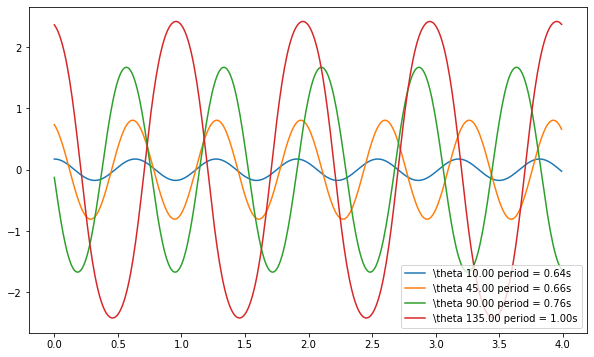

In [29]:
data = np.loadtxt('theta_rk4_all_v2.csv')
time = data[0,:]
theta_all = data[1:,:]

fig = plt.figure(figsize=(10,6))
period = []
for th in theta_all:
    plt.plot(time , th)
    p = find_avg_time(th, time)
    period.append(p)
    #plt.title('Period  = {:.2f}'.format(p))
    #plt.show()
    #plt.plot(time , theta_all[3])
theta = [10 , 45 , 90 , 135]
leg = [r'\theta {:.2f} period = {:.2f}s'.format(t, p) for t, p in zip(theta,period)]
#print(leg)
plt.legend(leg)
plt.savefig('rk4_solutions_v2.png')
plt.show()